In [1]:
pwd

'/home/wsuser/work'

In [2]:
!pip install keras==2.2.4

In [3]:
!pip install tensorflow==2.5.0

In [5]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='w2YYK53zC4qoYAIZs2wDupRZRvmAVqkve_CppNfN3juj',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'imageclassification-donotdelete-pr-zrpmmgvcvxliyu'
object_key = 'data_collection.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/

## Unzipping the DataSet Folder

In [6]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [7]:
ls -1

Dataset/
hand-gesture-model.tgz
hand.h5


In [8]:
pwd

'/home/wsuser/work'

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [13]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [14]:
x_train = train_datagen.flow_from_directory("/home/wsuser/work/Dataset/train",
                                            target_size=(64, 64),
                                            batch_size=3,
                                            color_mode='rgb',
                                            class_mode='categorical')

Found 594 images belonging to 6 classes.


In [15]:
x_test = test_datagen.flow_from_directory("/home/wsuser/work/Dataset/test",
                                          target_size=(64, 64),
                                          batch_size=3,
                                          color_mode='rgb',
                                          class_mode='categorical')

Found 30 images belonging to 6 classes.


In [16]:
x_train.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}

# Importing libraries

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

### Model Creation

In [19]:
model = Sequential()

In [20]:
model.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [21]:
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [22]:
model.add(Flatten())

In [23]:
model.add(Dense(units=512 , activation='relu'))

In [24]:
model.add(Dense(units=6, activation='softmax')) 

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               3211776   
_________________________________________________________________
dense_1 (Dense)              (None, 6)                

In [26]:
# import numpy as np
# import tensorflow as tf
# from keras.models import Sequential 
# from keras.layers import Dense,Flatten
# from keras.layers import Convolution2D,MaxPooling2D
# from keras.preprocessing.image import ImageDataGenerator

## Hidden layers

In [27]:
# model.add(Dense(300,activation='relu'))
# model.add(Dense(150,activation='relu'))

In [28]:
# model.add(Dense(4,activation='softmax'))

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
len(x_train)

198

In [31]:
model.fit(x_train,
                    steps_per_epoch = len(x_train) , 
                    epochs = 25, 
                    validation_data = x_test,
                    validation_steps = len(x_test))

Epoch 1/25
198/198 [==============================] - 14s 70ms/step - loss: 1.3210 - accuracy: 0.4916 - val_loss: 0.6284 - val_accuracy: 0.8000
Epoch 2/25
198/198 [==============================] - 14s 70ms/step - loss: 0.5924 - accuracy: 0.7879 - val_loss: 0.4605 - val_accuracy: 0.7667
Epoch 3/25
198/198 [==============================] - 14s 69ms/step - loss: 0.4165 - accuracy: 0.8586 - val_loss: 0.3333 - val_accuracy: 0.8000
Epoch 4/25
198/198 [==============================] - 14s 68ms/step - loss: 0.2977 - accuracy: 0.8923 - val_loss: 0.1563 - val_accuracy: 0.9333
Epoch 5/25
198/198 [==============================] - 14s 69ms/step - loss: 0.2374 - accuracy: 0.9057 - val_loss: 0.3768 - val_accuracy: 0.9000
Epoch 6/25
198/198 [==============================] - 15s 75ms/step - loss: 0.1546 - accuracy: 0.9444 - val_loss: 0.7488 - val_accuracy: 0.9000
Epoch 7/25
198/198 [==============================] - 14s 72ms/step - loss: 0.1484 - accuracy: 0.9377 - val_loss: 0.3401 - val_accuracy:

In [32]:
model.save('hand.h5')

In [33]:
ls -1

Dataset/
hand-gesture-model.tgz
hand.h5


# Test The Model

In [34]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [35]:
#load_the_model
model=load_model('hand.h5')

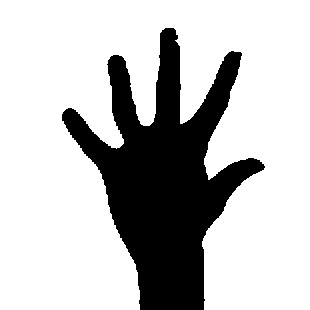

In [36]:
img=image.load_img(r"/home/wsuser/work/Dataset/test/5/4.jpg")
img

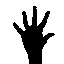

In [37]:
img=image.load_img(r"/home/wsuser/work/Dataset/test/5/4.jpg", target_size=(64,64))
img

In [38]:
x=image.img_to_array(img)

In [39]:
x=np.expand_dims(x,axis=0)

In [40]:
y=np.argmax(model.predict(x),axis=1)

In [41]:
y

array([5])

In [42]:
x_train.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}

In [43]:
index=['0','1','2','3','4','5']

In [44]:
index[y[0]]

'5'

In [45]:
img=image.load_img(r"/home/wsuser/work/Dataset/test/5/4.jpg", target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x=np.argmax(model.predict(x),axis=1)
index=['0','1','2','3','4','5']
index[y[0]]

'5'

In [46]:
!tar -zcvf hand-gesture-model.tgz hand.h5

hand.h5


In [47]:
import tensorflow as tf
tf.__version__

'2.5.0'

## IBM Deployment

In [48]:
!pip install watson-machine-learning-client

In [50]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"JmljsAGRtavsQFxun8wZ3-IYeasMrcYL55NZxJKIRYZD"
}

client=APIClient(wml_credentials)

In [51]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -------------  ------------------------
ID                                    NAME           CREATED
df95cd49-5e7c-446c-99bf-116822b51ddd  ibm_ntproject  2022-11-04T04:45:30.304Z
------------------------------------  -------------  ------------------------


In [52]:
client.set.default_space("df95cd49-5e7c-446c-99bf-116822b51ddd")

'SUCCESS'

In [53]:
client.software_specifications.list(200)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1

In [56]:
software_space_uid=client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')

In [57]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [58]:
model_details=client.repository.store_model(model='hand-gesture-model.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN Model Building",
    client.repository.ModelMetaNames.TYPE:'tensorflow_2.7',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [59]:
model_id=client.repository.get_model_id(model_details)

In [60]:
model_id

'e1307536-10d1-462e-b2c0-49b56ef25ec8'

In [61]:
client.repository.download(model_id,'hand.tar.gb')

Successfully saved model content to file: 'hand.tar.gb'


'/home/wsuser/work/hand.tar.gb'

In [62]:
ls -1

Dataset/
hand-gesture-model.tgz
hand.h5
hand.tar.gb


### Augmenting the data

In [47]:
# train_datagen = ImageDataGenerator(rescale=1./255,
#                                    shear_range=0.2,
#                                    zoom_range=0.2,
#                                    horizontal_flip=True)
# test_datagen=ImageDataGenerator(rescale=1./255)

### Loading our data and performing data agumentation

In [48]:
# x_train = train_datagen.flow_from_directory(r"C:\Users\nagul\Desktop\IBM_Project\Final Project\Dataset\Dataset\train",
#                                             target_size=(64, 64),
#                                             batch_size=3,
#                                             color_mode='grayscale',
#                                             class_mode='categorical')
# x_test = test_datagen.flow_from_directory(r"C:\Users\nagul\Desktop\IBM_Project\Final Project\Dataset\Dataset\test",
#                                           target_size=(64, 64),
#                                           batch_size=3,
#                                           color_mode='grayscale',
#                                           class_mode='categorical') 

In [49]:
# print(x_train.class_indices)